## Handcraft Features, 3 Physical Activity Classes, TTS by Subject

This notebook runs different ML models using the mean, st.dev., and range of the x,y,z accelerometer and gyroscope measurements for each sample (window of 2 secs.).

The test/train split is by subject.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

In [2]:
# read clean model data (10 subjects)
thigh100 = pd.read_pickle('./data/thigh_clean.pkl')

In [3]:
thigh100.head()

,attr_time_gyr,attr_x_gyr,attr_y_gyr,attr_z_gyr,attr_time_acc,attr_x_acc,attr_y_acc,attr_z_acc,activity,label,subject,sample_num
800,1435996984038,-0.786994,-0.328964,0.244081,1435996984038,0.469264,4.292205,1.912369,climbingdown,0,1,8
801,1435996984056,-0.539593,-0.340265,0.329907,1435996984056,0.769736,5.878364,2.906561,climbingdown,0,1,8
802,1435996984076,-0.334953,-0.454802,0.377860,1435996984076,1.098939,7.167043,3.312977,climbingdown,0,1,8
803,1435996984099,-0.086331,-0.496036,0.339070,1435996984099,1.409586,6.937798,4.225766,climbingdown,0,1,8
804,1435996984118,0.157099,-0.525052,0.350982,1435996984118,1.442507,6.427235,5.054759,climbingdown,0,1,8


In [4]:
thigh100.columns

Index(['attr_time_gyr', 'attr_x_gyr', 'attr_y_gyr', 'attr_z_gyr',
       'attr_time_acc', 'attr_x_acc', 'attr_y_acc', 'attr_z_acc', 'activity',
       'label', 'subject', 'sample_num'],
      dtype='object')

In [5]:
def Range(x):
    return x.max() - x.min()

In [6]:
# calculate range, sd, mean for each sample of 100 obs (2 sec)
ranges = thigh100.groupby(['activity','subject','sample_num']).apply(Range).add_prefix('range_')
st_devs = thigh100.groupby(['activity','subject','sample_num']).std().add_prefix('std_')
means = thigh100.groupby(['activity','subject','sample_num']).mean().add_prefix('mean_')

In [7]:
means.head()

mean_attr_time_gyr  mean_attr_x_gyr  \
activity     subject sample_num                                        
climbingdown 1       8                 1.435997e+12         0.087604   
                     9                 1.435997e+12        -0.166086   
                     10                1.435997e+12         0.167801   
                     11                1.435997e+12        -0.271014   
                     13                1.435997e+12        -0.047453   

                                 mean_attr_y_gyr  mean_attr_z_gyr  \
activity     subject sample_num                                     
climbingdown 1       8                 -0.277429         0.141031   
                     9                 -1.012663        -0.062882   
                     10                -0.480547         0.051044   
                     11                -0.662130        -0.022941   
                     13                -0.292410         0.159689   

                                 mean_attr_time_acc  mean_attr_x_acc  \
activity     subject sample_num                                        
climbingdown 1       8                 1.435997e+12         0.379439   
                     9                 1.435997e+12         0.155054   
                     10                1.435997e+12         0.311127   
                     11                1.435997e+12         0.001209   
                     13                1.435997e+12         0.445256   

                                 mean_attr_y_acc  mean_attr_z_acc  mean_label  
activity     subject sample_num                                                
climbingdown 1       8                  9.024692         2.418964         0.0  
                     9                  9.439451         1.640513         0.0  
                     10                 8.968662         2.061090         0.0  
                     11                 9.386025         1.909316         0.0  
                     13                 8.932270         2.273953         0.0

In [8]:
# combine sd, mean, range into single summary dataset
df = pd.concat([st_devs,means,ranges],axis=1)
df.reset_index(inplace=True)

In [9]:
df.head()

,activity,subject,sample_num,std_attr_time_gyr,std_attr_x_gyr,std_attr_y_gyr,std_attr_z_gyr,std_attr_time_acc,std_attr_x_acc,std_attr_y_acc,...,mean_label,range_attr_time_gyr,range_attr_x_gyr,range_attr_y_gyr,range_attr_z_gyr,range_attr_time_acc,range_attr_x_acc,range_attr_y_acc,range_attr_z_acc,range_label
0,climbingdown,1,8,581.291714,0.942661,0.855090,0.374873,582.030385,1.470079,3.465349,...,0.0,1985.0,4.308738,5.279708,1.747991,1985.0,9.214684,15.316306,18.915391,0.0
1,climbingdown,1,9,579.635665,0.976116,0.803382,0.449999,579.373594,1.566840,3.024721,...,0.0,1981.0,4.679228,4.421137,2.178345,1982.0,7.890690,13.982736,21.457434,0.0
2,climbingdown,1,10,582.685275,0.995383,1.088734,0.458140,582.662663,2.012424,3.810429,...,0.0,2024.0,4.831944,7.441561,2.543032,2035.0,14.829087,15.386336,20.637421,0.0
3,climbingdown,1,11,580.331920,1.016299,1.113550,0.605436,581.116097,1.996506,3.389655,...,0.0,1959.0,4.633718,6.475477,2.649017,1969.0,11.089942,14.787786,16.913838,0.0
4,climbingdown,1,13,581.322631,1.065192,0.959656,0.362656,581.596644,1.581883,3.813839,...,0.0,1993.0,4.612033,8.074722,1.933694,1993.0,7.879318,15.717933,21.537640,0.0


In [10]:
df.columns

Index(['activity', 'subject', 'sample_num', 'std_attr_time_gyr',
       'std_attr_x_gyr', 'std_attr_y_gyr', 'std_attr_z_gyr',
       'std_attr_time_acc', 'std_attr_x_acc', 'std_attr_y_acc',
       'std_attr_z_acc', 'std_label', 'mean_attr_time_gyr', 'mean_attr_x_gyr',
       'mean_attr_y_gyr', 'mean_attr_z_gyr', 'mean_attr_time_acc',
       'mean_attr_x_acc', 'mean_attr_y_acc', 'mean_attr_z_acc', 'mean_label',
       'range_attr_time_gyr', 'range_attr_x_gyr', 'range_attr_y_gyr',
       'range_attr_z_gyr', 'range_attr_time_acc', 'range_attr_x_acc',
       'range_attr_y_acc', 'range_attr_z_acc', 'range_label'],
      dtype='object')

In [11]:
df.activity.value_counts()

sitting         3182
standing        3163
walking         3146
lying           3118
climbingup      2484
running         2370
climbingdown    2114
jumping          247
Name: activity, dtype: int64

In [12]:
# recode pa as 3 classes of activity
df['pa']=df.activity.replace({'sitting':'0_sedentary','standing':'0_sedentary','walking':'1_light_moderate','lying':'0_sedentary',
                              'climbingup':'1_light_moderate','running':'2_vigorous','climbingdown':'1_light_moderate','jumping':'2_vigorous'})

In [13]:
df.pa.value_counts()

0_sedentary         9463
1_light_moderate    7744
2_vigorous          2617
Name: pa, dtype: int64

## Plot Features by PA Classes

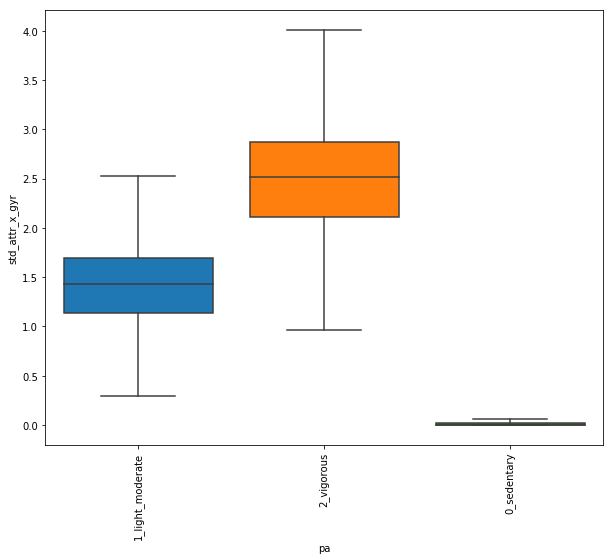

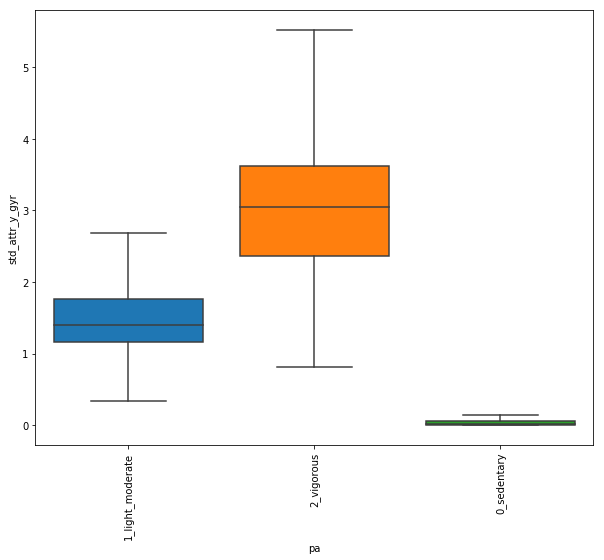

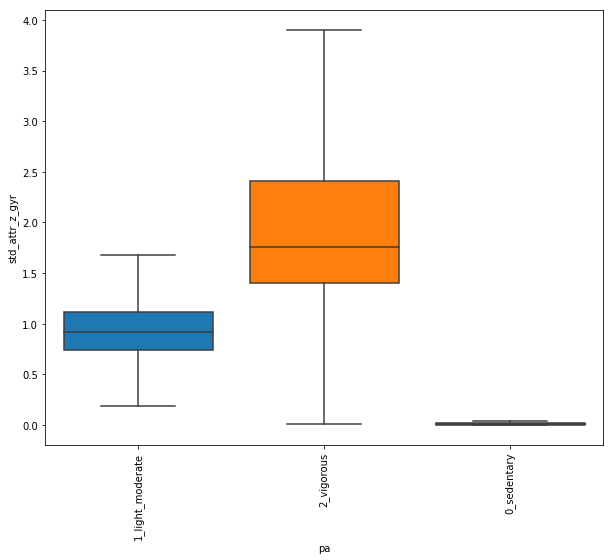

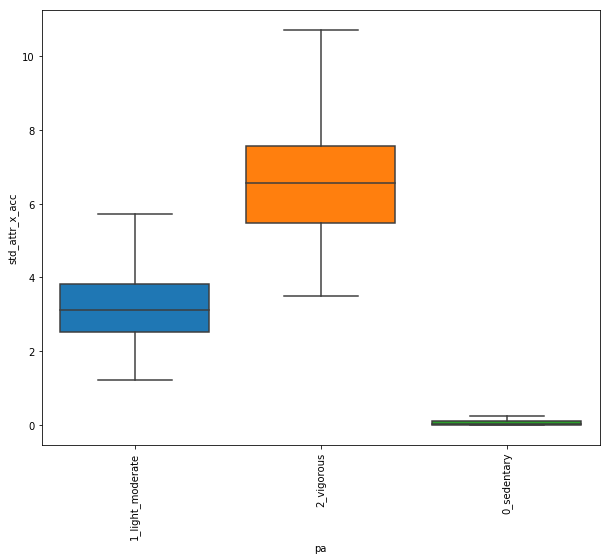

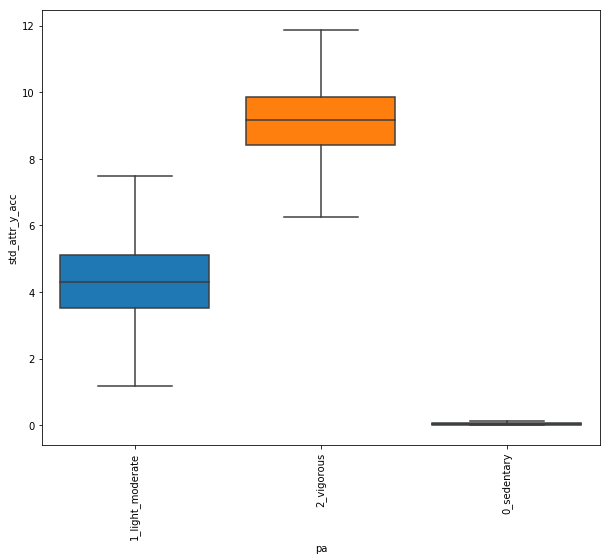

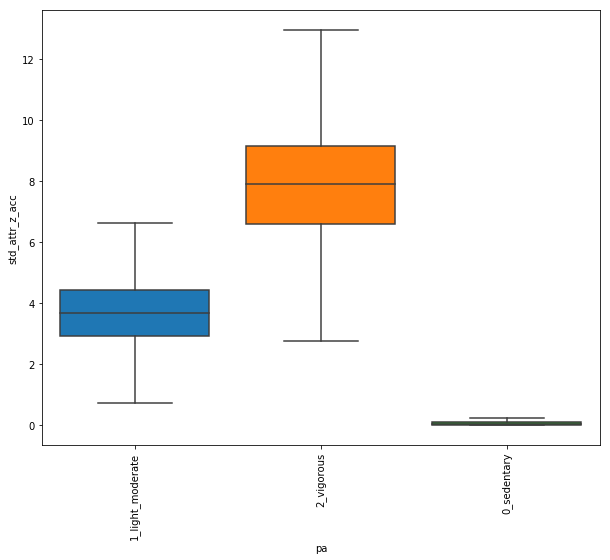

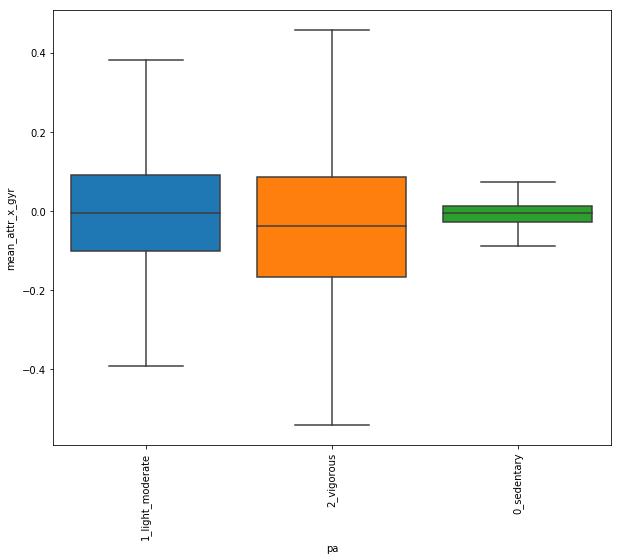

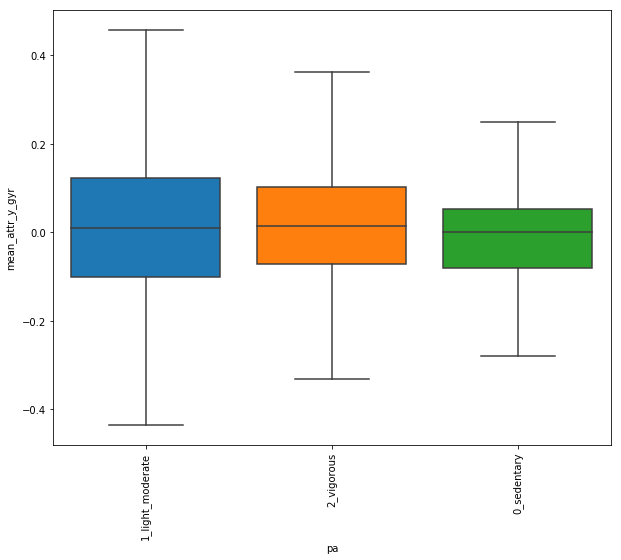

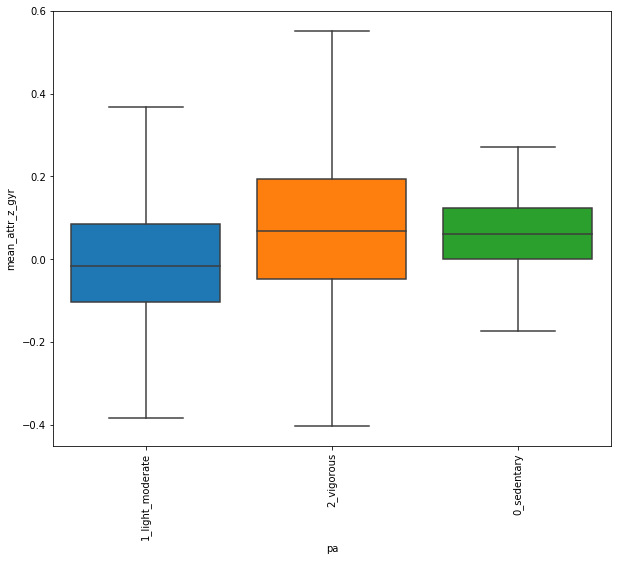

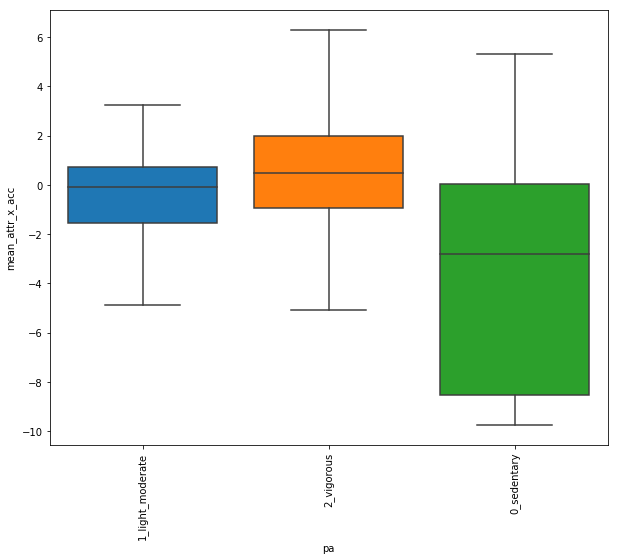

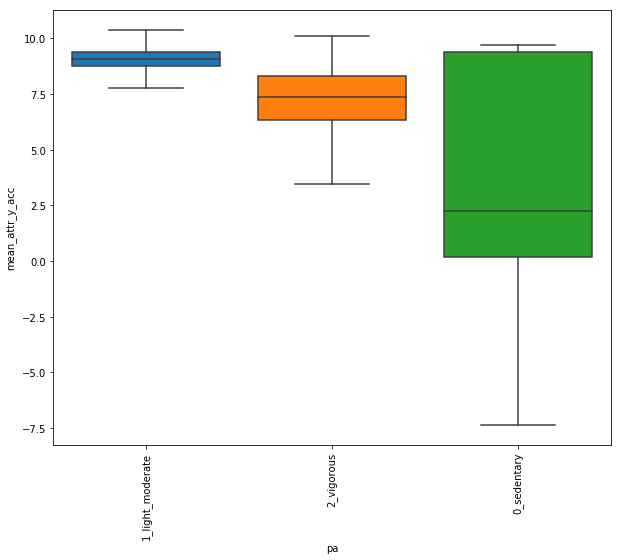

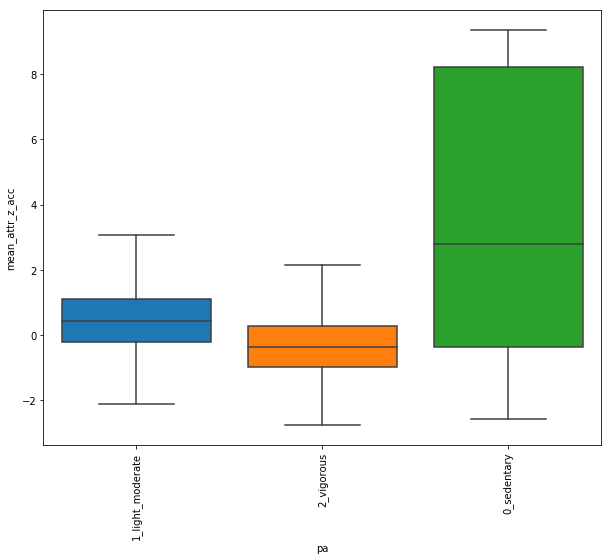

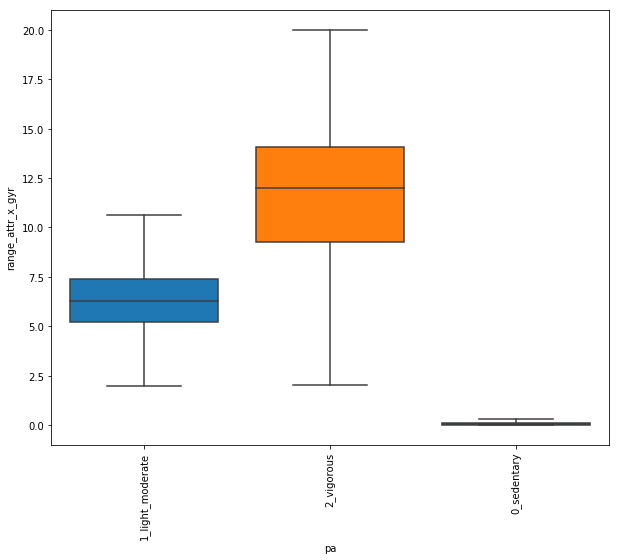

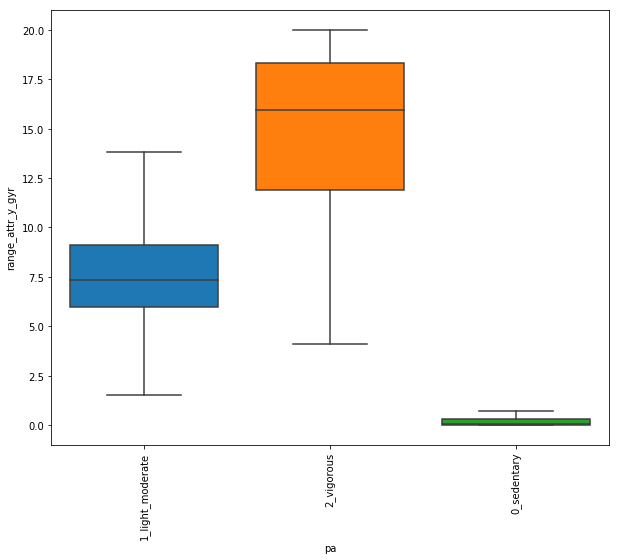

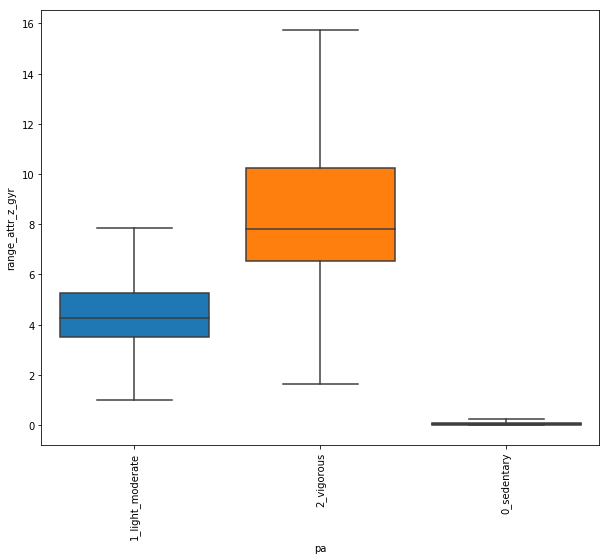

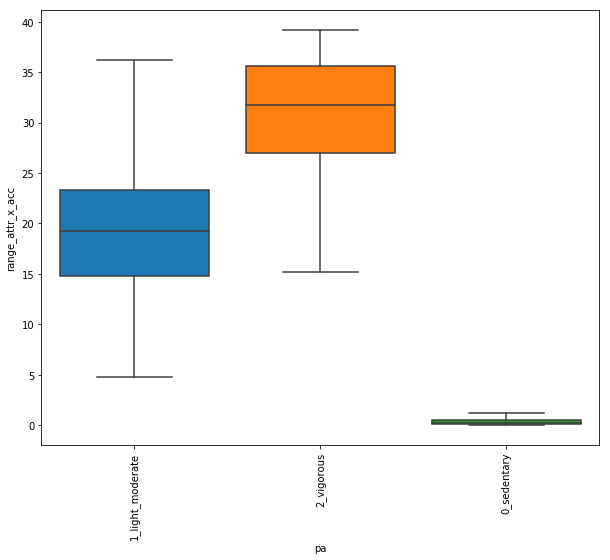

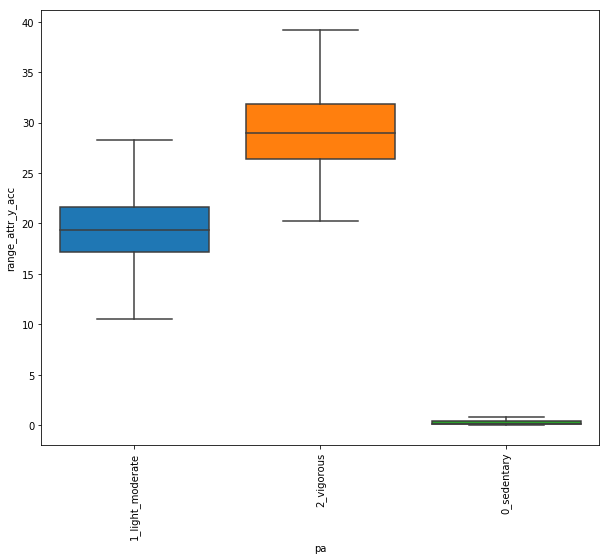

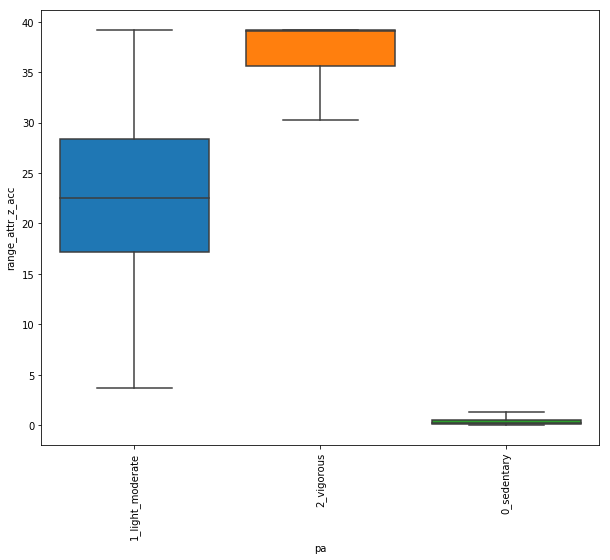

In [17]:
columns=['std_attr_x_gyr', 'std_attr_y_gyr', 'std_attr_z_gyr',
         'std_attr_x_acc', 'std_attr_y_acc', 'std_attr_z_acc', 
         'mean_attr_x_gyr', 'mean_attr_y_gyr', 'mean_attr_z_gyr', 
         'mean_attr_x_acc', 'mean_attr_y_acc', 'mean_attr_z_acc',
         'range_attr_x_gyr', 'range_attr_y_gyr','range_attr_z_gyr', 
         'range_attr_x_acc', 'range_attr_y_acc', 'range_attr_z_acc']
for feature in columns:
    plt.figure(figsize=(10,8))
    sns.boxplot(x='pa', y=feature,data=df, showfliers=False, saturation=1)
    plt.ylabel(feature)
    plt.xticks(rotation=90)
    plt.show()

## Train / Test Split by Subject

In [59]:
columns=[
       'std_attr_x_gyr', 'std_attr_y_gyr', 'std_attr_z_gyr',
         'std_attr_x_acc', 'std_attr_y_acc', 'std_attr_z_acc', 
         'mean_attr_x_gyr', 'mean_attr_y_gyr', 'mean_attr_z_gyr', 
         'mean_attr_x_acc', 'mean_attr_y_acc', 'mean_attr_z_acc',
         'range_attr_x_gyr', 'range_attr_y_gyr','range_attr_z_gyr', 
         'range_attr_x_acc', 'range_attr_y_acc', 'range_attr_z_acc']
# create x and y for train and test
train_mask = df.subject <= 7
test_mask = df.subject >= 8
X_train = df[columns][train_mask]
X_test = df[columns][test_mask]
y_train = df.pa[train_mask]
y_test = df.pa[test_mask]

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
X_train.shape

(13573, 12)

In [22]:
y_train.shape

(13573,)

## Try fitting a whole bunch of models (logistic regression, KNN, decision trees, SVM, Naive Bayes, XGBoost)

In [23]:
from xgboost import XGBClassifier
from statsmodels.api import add_constant,MNLogit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,accuracy_score
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB,GaussianNB

In [24]:
def fit_model(model):
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print(f'Training F1 score is: {f1_score(y_train,y_pred_train,average="macro"):.3f}')
    print(f'Testing F1 score is: {f1_score(y_test,y_pred_test,average="macro"):.3f}')
    print(f'Training Acc score is: {accuracy_score(y_train,y_pred_train):.3f}')
    print(f'Testing Acc score is: {accuracy_score(y_test,y_pred_test):.3f}') 

In [51]:
model = LogisticRegression(solver='lbfgs',multi_class='multinomial')
fit_model(model)

C:\Users\pauls\.conda\envs\dsi\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Training F1 score is: 0.996
Testing F1 score is: 0.956
Training Acc score is: 0.997
Testing Acc score is: 0.973


In [31]:
model = KNeighborsClassifier(n_neighbors=3)
fit_model(model)

Training F1 score is: 0.997
Testing F1 score is: 0.923
Training Acc score is: 0.998
Testing Acc score is: 0.954


In [32]:
model = DecisionTreeClassifier(max_depth=22)
fit_model(model)

Training F1 score is: 1.000
Testing F1 score is: 0.931
Training Acc score is: 1.000
Testing Acc score is: 0.958


In [33]:
model = BaggingClassifier(max_features=.8,max_samples=1.0,n_estimators=100,random_state=42)
fit_model(model)

Training F1 score is: 1.000
Testing F1 score is: 0.934
Training Acc score is: 1.000
Testing Acc score is: 0.961


In [34]:
model = RandomForestClassifier(max_depth=20,random_state=42,min_samples_leaf=1,n_estimators=100)
fit_model(model)

Training F1 score is: 1.000
Testing F1 score is: 0.934
Training Acc score is: 1.000
Testing Acc score is: 0.961


In [35]:
model = ExtraTreesClassifier(max_depth=20,max_leaf_nodes=None,n_estimators=100)
fit_model(model)

Training F1 score is: 1.000
Testing F1 score is: 0.934
Training Acc score is: 1.000
Testing Acc score is: 0.961


In [36]:
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20,random_state=42),learning_rate=1.0,random_state=42)
fit_model(model)

Training F1 score is: 1.000
Testing F1 score is: 0.914
Training Acc score is: 1.000
Testing Acc score is: 0.947


In [37]:
model = svm.SVC(kernel='poly',gamma='scale',C=1.0)
fit_model(model)

Training F1 score is: 0.997
Testing F1 score is: 0.936
Training Acc score is: 0.998
Testing Acc score is: 0.961


In [38]:
model = GaussianNB()
fit_model(model)

Training F1 score is: 0.965
Testing F1 score is: 0.886
Training Acc score is: 0.975
Testing Acc score is: 0.925


In [39]:
model = XGBClassifier(max_depth=4,random_state=42)
fit_model(model)

Training F1 score is: 1.000
Testing F1 score is: 0.940
Training Acc score is: 1.000
Testing Acc score is: 0.964


## Examine logistic regression coefficients using statsmodels MNLogit

In [93]:
# create X and y using all 10 subjects
y = df.pa
columns=['std_attr_x_gyr', 'std_attr_y_gyr', 'std_attr_z_gyr',
         'std_attr_x_acc', 'std_attr_y_acc', 'std_attr_z_acc', 
         'mean_attr_x_gyr', 'mean_attr_y_gyr', 'mean_attr_z_gyr', 
         'mean_attr_x_acc', 'mean_attr_y_acc', 'mean_attr_z_acc']
X = df[columns]
X = add_constant(X)

C:\Users\pauls\.conda\envs\dsi\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [94]:
X.shape

(19824, 13)

In [95]:
y.shape

(19824,)

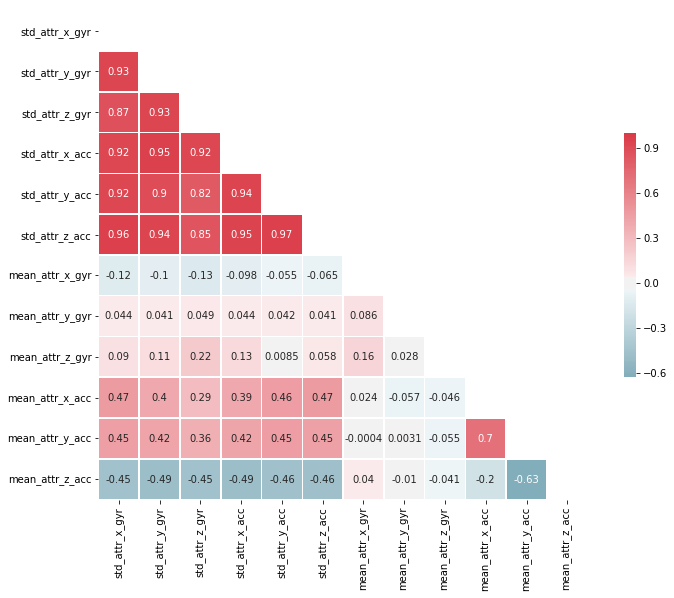

In [96]:
# plot correlation coefficients
import seaborn as sns
# source: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Compute the correlation matrix
X = df[columns]
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [97]:
smodel = MNLogit(y,X)

model_fitted=smodel.fit(method='bfgs',maxiter=5000)._results

Optimization terminated successfully.
         Current function value: 0.012699
         Iterations: 273
         Function evaluations: 275
         Gradient evaluations: 275


In [98]:
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                     pa   No. Observations:                19824
Model:                        MNLogit   Df Residuals:                    19800
Method:                           MLE   Df Model:                           22
Date:                Mon, 27 May 2019   Pseudo R-squ.:                  0.9871
Time:                        20:47:43   Log-Likelihood:                -251.74
converged:                       True   LL-Null:                       -19576.
                                        LLR p-value:                     0.000
===================================================================================
pa=1_light_moderate       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
std_attr_x_gyr          4.1231      1.890      2.182      0.029       0.420       7.827
std_attr_y_gyr         -4.0160      1.537     -2.613      0.009      -7.028      -1.004
std_attr_z_gyr         13.5420      2.962      4.572      0.000       7.737      19.347
std_attr_x_acc          6.8555      1.345      5.095      0.000       4.219       9.493
std_attr_y_acc          5.7115      1.064      5.366      0.000       3.625       7.798
std_attr_z_acc         -2.8522      1.039     -2.746      0.006      -4.888      -0.817
mean_attr_x_gyr        -6.2494      2.312     -2.703      0.007     -10.780      -1.719
mean_attr_y_gyr         3.0987      1.087      2.852      0.004       0.969       5.228
mean_attr_z_gyr       -14.7084      3.883     -3.788      0.000     -22.318      -7.098
mean_attr_x_acc         1.5936      0.184      8.644      0.000       1.232       1.955
mean_attr_y_acc        -1.3913      0.154     -9.021      0.000      -1.694      -1.089
mean_attr_z_acc        -2.4637      0.368     -6.687      0.000      -3.186      -1.742
---------------------------------------------------------------------------------------
  pa=2_vigorous       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
std_attr_x_gyr      5.1043      1.959      2.605      0.009       1.264       8.944
std_attr_y_gyr     -7.2961      1.588     -4.593      0.000     -10.409      -4.183
std_attr_z_gyr     14.3945      3.045      4.727      0.000       8.426      20.363
std_attr_x_acc      8.7537      1.377      6.357      0.000       6.055      11.453
std_attr_y_acc      7.7875      1.069      7.283      0.000       5.692       9.883
std_attr_z_acc     -2.3363      1.059     -2.205      0.027      -4.413      -0.260
mean_attr_x_gyr   -12.2039      2.456     -4.970      0.000     -17.017      -7.391
mean_attr_y_gyr     4.5136      1.249      3.615      0.000       2.066       6.961
mean_attr_z_gyr    -2.6456      4.111     -0.644      0.520     -10.702       5.411
mean_attr_x_acc     2.6324      0.190     13.888      0.000       2.261       3.004
mean_attr_y_acc    -4.0727      0.223    -18.263      0.000      -4.510      -3.636
mean_attr_z_acc    -4.9702      0.351    -14.144      0.000      -5.659      -4.281
===================================================================================
"""

### Model with subject dummies

In [99]:
lr_data = pd.get_dummies(data=df,columns=['subject'],drop_first=True)
columns=['std_attr_x_gyr', 'std_attr_y_gyr', 'std_attr_z_gyr',
         'std_attr_x_acc', 'std_attr_y_acc', 'std_attr_z_acc', 
         'mean_attr_x_gyr', 'mean_attr_y_gyr', 'mean_attr_z_gyr', 
         'mean_attr_x_acc', 'mean_attr_y_acc', 'mean_attr_z_acc','subject_2',
       'subject_3', 'subject_4', 'subject_5', 'subject_6', 'subject_7',
       'subject_8', 'subject_9', 'subject_10']
X = lr_data[columns]
y = lr_data.pa

X = add_constant(X)

In [100]:
smodel = MNLogit(y,X)

model_fitted=smodel.fit(method='bfgs',maxiter=5000)._results

Optimization terminated successfully.
         Current function value: 0.003105
         Iterations: 390
         Function evaluations: 392
         Gradient evaluations: 392


In [101]:
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                     pa   No. Observations:                19824
Model:                        MNLogit   Df Residuals:                    19780
Method:                           MLE   Df Model:                           42
Date:                Mon, 27 May 2019   Pseudo R-squ.:                  0.9969
Time:                        20:48:48   Log-Likelihood:                -61.563
converged:                       True   LL-Null:                       -19576.
                                        LLR p-value:                     0.000
===================================================================================
pa=1_light_moderate       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -29.3131     14.767     -1.985      0.047     -58.256      -0.370
std_attr_x_gyr         15.3094      8.118      1.886      0.059      -0.602      31.221
std_attr_y_gyr          2.0725      3.244      0.639      0.523      -4.285       8.430
std_attr_z_gyr          1.9385      7.905      0.245      0.806     -13.555      17.432
std_attr_x_acc         12.9834      6.194      2.096      0.036       0.843      25.123
std_attr_y_acc          5.8955      2.201      2.678      0.007       1.581      10.210
std_attr_z_acc         -3.2283      1.973     -1.636      0.102      -7.095       0.639
mean_attr_x_gyr        -6.2493      7.043     -0.887      0.375     -20.053       7.554
mean_attr_y_gyr         3.0070      1.757      1.712      0.087      -0.436       6.450
mean_attr_z_gyr       -10.1656      7.920     -1.284      0.199     -25.688       5.357
mean_attr_x_acc         1.0391      1.248      0.833      0.405      -1.407       3.485
mean_attr_y_acc         0.3165      1.251      0.253      0.800      -2.136       2.769
mean_attr_z_acc         0.6128      0.835      0.734      0.463      -1.023       2.248
subject_2              -3.1400     15.067     -0.208      0.835     -32.671      26.391
subject_3              -5.7826      7.090     -0.816      0.415     -19.678       8.113
subject_4              -5.5618      4.893     -1.137      0.256     -15.152       4.029
subject_5              -9.5196      7.489     -1.271      0.204     -24.198       5.159
subject_6               0.3596      5.916      0.061      0.952     -11.236      11.955
subject_7              -9.0032      6.600     -1.364      0.173     -21.938       3.932
subject_8               4.3868      5.038      0.871      0.384      -5.488      14.261
subject_9               1.8105      7.128      0.254      0.799     -12.159      15.780
subject_10              0.9043      4.117      0.220      0.826      -7.164       8.973
---------------------------------------------------------------------------------------
  pa=2_vigorous       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -23.7497     16.185     -1.467      0.142     -55.472       7.973
std_attr_x_gyr     12.3390      8.328      1.482      0.138      -3.984      28.662
std_attr_y_gyr      3.9805      3.396      1.172      0.241      -2.675      10.636
std_attr_z_gyr      3.3111      8.084      0.410      0.682     -12.533      19.155
std_attr_x_acc     15.9911      6.228      2.568      0.010       3.784      28.198
std_attr_y_acc      8.5340      2.269      3.761      0.000       4.087      12.981
std_attr_z_acc     -3.5004      2.074     -1.688      0.091      -7.565       0.565
mean_attr_x_gyr   -10.0612      7.389     -1.362      0.173     -24.543       4.420
mean_attr_y_gyr     4.4019      2.208      1.994      0.046       0.075       8.729
mean_attr_z_gyr     0.9972      8

In the above model, none of the subject dummies are significantly different except for Subjects 5 & 7 for vigorous PA. This suggests that the model is fairly generalizable.

In [102]:
# simpler model w/out gyroscope 
columns=['std_attr_x_acc', 'std_attr_y_acc', 'std_attr_z_acc', 
         'mean_attr_x_acc', 'mean_attr_y_acc', 'mean_attr_z_acc']
X = df[columns]
y = df.pa

X = add_constant(X)

In [103]:
smodel = MNLogit(y,X)

model_fitted=smodel.fit(method='bfgs',maxiter=5000)._results

Optimization terminated successfully.
         Current function value: 0.014289
         Iterations: 195
         Function evaluations: 199
         Gradient evaluations: 199


In [104]:
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                     pa   No. Observations:                19824
Model:                        MNLogit   Df Residuals:                    19810
Method:                           MLE   Df Model:                           12
Date:                Mon, 27 May 2019   Pseudo R-squ.:                  0.9855
Time:                        20:52:01   Log-Likelihood:                -283.27
converged:                       True   LL-Null:                       -19576.
                                        LLR p-value:                     0.000
===================================================================================
pa=1_light_moderate       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -20.3095      5.669     -3.582      0.000     -31.421      -9.198
std_attr_x_acc          5.0238      1.255      4.002      0.000       2.564       7.484
std_attr_y_acc          5.6356      0.924      6.101      0.000       3.825       7.446
std_attr_z_acc         -0.7667      0.707     -1.084      0.278      -2.152       0.619
mean_attr_x_acc        -0.4629      0.219     -2.112      0.035      -0.893      -0.033
mean_attr_y_acc         0.8612      0.585      1.472      0.141      -0.285       2.008
mean_attr_z_acc        -0.2462      0.337     -0.730      0.465      -0.907       0.415
---------------------------------------------------------------------------------------
  pa=2_vigorous       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -40.9935      6.089     -6.732      0.000     -52.928     -29.059
std_attr_x_acc      9.2271      1.297      7.117      0.000       6.686      11.768
std_attr_y_acc      8.1330      0.948      8.577      0.000       6.275       9.992
std_attr_z_acc     -1.5372      0.729     -2.108      0.035      -2.967      -0.108
mean_attr_x_acc     0.3782      0.243      1.558      0.119      -0.097       0.854
mean_attr_y_acc    -0.7582      0.615     -1.233      0.218      -1.964       0.447
mean_attr_z_acc    -0.2781      0.389     -0.715      0.475      -1.041       0.485
===================================================================================
"""

## Fit logistic regression model to all 10 subjects to use on holdout data

In [105]:
columns=[
        'std_attr_x_gyr', 'std_attr_y_gyr', 'std_attr_z_gyr',
         'std_attr_x_acc', 'std_attr_y_acc', 'std_attr_z_acc', 
          'mean_attr_x_gyr', 'mean_attr_y_gyr', 'mean_attr_z_gyr', 
          'mean_attr_x_acc', 'mean_attr_y_acc', 'mean_attr_z_acc',
         'range_attr_x_gyr', 'range_attr_y_gyr','range_attr_z_gyr', 
         'range_attr_x_acc', 'range_attr_y_acc', 'range_attr_z_acc'
]
X = df[columns]
y = df.pa

In [106]:
model = LogisticRegression(solver='newton-cg',multi_class='multinomial', max_iter=500)
model.fit(X,y)
y_pred = model.predict(X)
print(f'Training F1 score is: {f1_score(y,y_pred,average="macro"):.3f}')
print(f'Training acc score is: {accuracy_score(y,y_pred):.3f}')

Training F1 score is: 0.997
Training acc score is: 0.998


In [108]:
# save model for later use
pkl_filename = "./data/LR_model.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(model, file)

## Run the model without the gyroscope data

In [107]:
columns=[
#         'std_attr_x_gyr', 'std_attr_y_gyr', 'std_attr_z_gyr',
         'std_attr_x_acc', 'std_attr_y_acc', 'std_attr_z_acc', 
          'mean_attr_x_gyr', 'mean_attr_y_gyr', 'mean_attr_z_gyr', 
#           'mean_attr_x_acc', 'mean_attr_y_acc', 'mean_attr_z_acc',
         'range_attr_x_gyr', 'range_attr_y_gyr','range_attr_z_gyr', 
         'range_attr_x_acc', 'range_attr_y_acc', 'range_attr_z_acc'
]
X = df[columns]
y = df.pa

In [109]:
model = LogisticRegression(solver='newton-cg',multi_class='multinomial', max_iter=500)
model.fit(X,y)
y_pred = model.predict(X)
print(f'Training F1 score is: {f1_score(y,y_pred,average="macro"):.3f}')
print(f'Training acc score is: {accuracy_score(y,y_pred):.3f}')

Training F1 score is: 0.995
Training acc score is: 0.997


In [110]:
# save model for later use
pkl_filename = "./data/LR_model_acc.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(model, file)